In [142]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [143]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [144]:
X_train.shape

(50000, 32, 32, 3)

In [145]:
X_test.shape

(10000, 32, 32, 3)

In [146]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [147]:
classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [167]:
## data exploration
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

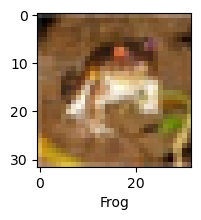

In [168]:
plot_sample(X_train,y_train,0)

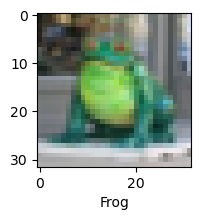

In [171]:
plot_sample(X_test, y_test,19)

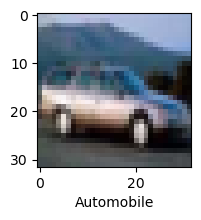

In [150]:
plot_sample(X_train,y_train,4)

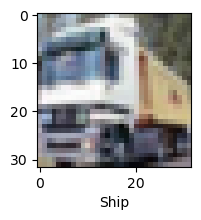

In [166]:
plot_sample(X_test, y_test,1)

In [151]:
## scaling
X_train=X_train/255
X_test=X_test/255

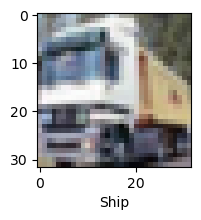

In [165]:
plot_sample(X_test, y_test,1)

In [152]:
## model building
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation='sigmoid'),
    ])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.2995 - loss: 1.9360
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.4245 - loss: 1.6361
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.4490 - loss: 1.5569
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.4759 - loss: 1.4860
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.4960 - loss: 1.4423


In [153]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4481 - loss: 1.5424


[1.543625831604004, 0.4453999996185303]

In [154]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=model.predict(X_test)
y_pred_class=[np.argmax(x) for x in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [155]:
y_pred_class[:5]

[3, 9, 8, 8, 4]

In [156]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [157]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.33      0.46      1000
           1       0.67      0.46      0.54      1000
           2       0.52      0.14      0.21      1000
           3       0.37      0.24      0.29      1000
           4       0.37      0.57      0.45      1000
           5       0.36      0.42      0.39      1000
           6       0.60      0.39      0.47      1000
           7       0.67      0.36      0.47      1000
           8       0.51      0.72      0.59      1000
           9       0.31      0.83      0.45      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.43     10000
weighted avg       0.51      0.45      0.43     10000



In [158]:
## ann is performing very poorly

In [159]:
cnn=keras.Sequential([
    ## cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    ## dense
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    ])


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.3707 - loss: 1.7409
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.5690 - loss: 1.2210
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6303 - loss: 1.0558
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6598 - loss: 0.9742
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6805 - loss: 0.9201
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.6926 - loss: 0.8776
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7094 - loss: 0.8356
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7252 - loss: 0.7937
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7310 - loss: 0.7716
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7438 - loss: 0.7367


In [160]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6868 - loss: 0.9290


[0.9447706937789917, 0.6776999831199646]

In [161]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[2.9759012e-02, 2.0457185e-03, 1.5042924e-02, 6.9786012e-01,
        8.3073853e-03, 1.9811749e-01, 1.4524396e-02, 1.6398891e-04,
        2.2152845e-02, 1.2026112e-02],
       [2.0268718e-02, 3.7755859e-01, 1.6368213e-05, 4.9448586e-06,
        6.7051383e-07, 2.9912374e-07, 5.5112008e-07, 4.2932987e-07,
        5.8765608e-01, 1.4493322e-02],
       [4.1100472e-02, 2.7515340e-01, 3.5202494e-03, 4.1859341e-03,
        9.7133714e-04, 6.5449812e-04, 7.3720422e-03, 5.8307829e-03,
        6.2163359e-01, 3.9577574e-02],
       [6.7108649e-01, 1.8815632e-01, 3.0232161e-02, 7.0921029e-03,
        4.1021575e-04, 2.5984281e-04, 4.5019197e-03, 1.2352483e-03,
        9.5048636e-02, 1.9770761e-03],
       [3.4221864e-06, 2.3970326e-05, 1.2447727e-02, 3.2281891e-02,
        2.2017932e-01, 9.4014695e-03, 7.2551376e-01, 9.2385781e-05,
        5.3727428e-05, 2.3546040e-06]], dtype=float32)

In [162]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [163]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

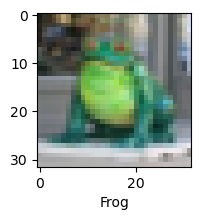

In [189]:
plot_sample(X_test, y_test,19)

In [188]:
classes[y_classes[19]]

'Frog'

In [178]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.77      0.84      0.80      1000
           2       0.58      0.56      0.57      1000
           3       0.52      0.44      0.47      1000
           4       0.72      0.49      0.58      1000
           5       0.54      0.66      0.59      1000
           6       0.78      0.76      0.77      1000
           7       0.68      0.73      0.70      1000
           8       0.75      0.81      0.78      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000

